In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_restaurants = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')
df_restaurants_menus = pd.read_csv('data/raw/restaurant-menus.csv')
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60596 non-null  int64  
 1   position       60596 non-null  int64  
 2   name           60596 non-null  object 
 3   score          33967 non-null  float64
 4   ratings        33967 non-null  float64
 5   category       60575 non-null  object 
 6   price_range    60596 non-null  int64  
 7   full_address   60596 non-null  object 
 8   zip_code       60596 non-null  object 
 9   lat            60596 non-null  float64
 10  lng            60596 non-null  float64
 11  restaurant_id  60596 non-null  float64
 12  avg_price      60596 non-null  float64
 13  price_sum      60596 non-null  float64
 14  price_min      60596 non-null  float64
 15  price_max      60596 non-null  float64
 16  desc_avg_len   60596 non-null  float64
dtypes: float64(10), int64(3), object(4)
memory usage: 

## Which ZIP codes host the most restaurants?

In [5]:
print('there are ', df_restaurants['zip_code'].unique().size, ' unique zip code')
most_used_zip_cods = df_restaurants['zip_code'].value_counts().head(5).reset_index()
most_used_zip_cods

there are  2415  unique zip code


,zip_code,count
0,75034,321
1,77494,216
2,77004,215
3,77057,206
4,22314,184


Text(0, 0.5, 'count')

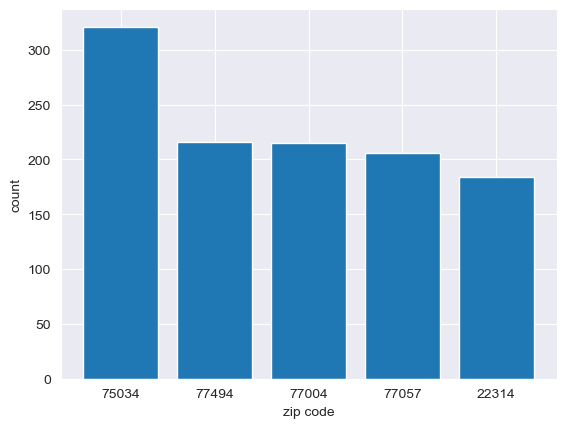

In [6]:
plt.bar(most_used_zip_cods['zip_code'], most_used_zip_cods['count'])
plt.xlabel('zip code')
plt.ylabel('count')

## How are restaurants distributed geographically?
using `Latitude` and `Longitude` we can calculate and And distribute the position on a map

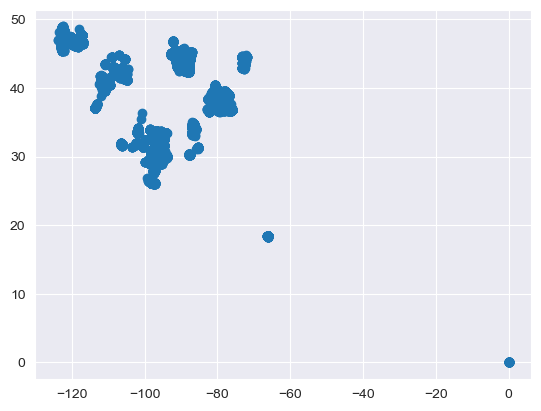

In [7]:
plt.scatter(df_restaurants['lng'], df_restaurants['lat'])

## To make the visualization more clear we can cut the same part from the map

In [8]:
print('max Longitude', df_restaurants['lng'].max())
print('min Longitude', df_restaurants['lng'].min())
print('max Latitude', df_restaurants['lat'].max())
print('min Latitude', df_restaurants['lat'].min())


max Longitude 0.0
min Longitude -123.84124
max Latitude 48.96395
min Latitude 0.0


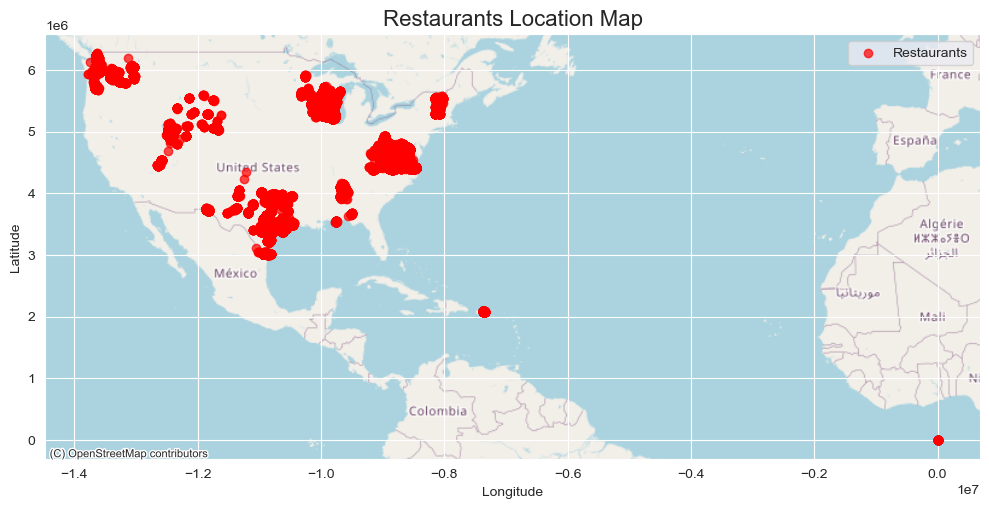

In [9]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

# Convert your DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df_restaurants,
    geometry=gpd.points_from_xy(df_restaurants['lng'], df_restaurants['lat']),
    crs="EPSG:4326"  # WGS84 for lat/lon
)

# Reproject to Web Mercator for plotting with contextily
gdf = gdf.to_crs(epsg=3857)

# Plot with background map
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, marker='o', color='red', alpha=0.7, label="Restaurants")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Format the plot
ax.set_title("Restaurants Location Map", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()
plt.tight_layout()
plt.show()


# Is there a relationship between geographic position and review ratings?

To answer this question, we first need to categorize the data based on latitude and longitude.

Here are the updated geographic categories:

| Category Number | Latitude Range | Longitude Range  | Description                     |
|-----------------|----------------|------------------|---------------------------------|
| 1               | 45 to 50       | -150 to -110     | Far Northwest                   |
| 2               | 35 to 45       | -120 to -100     | Western to Central US           |
| 3               | 25 to 38       | -110 to -90      | Southern Central                |
| 4               | 28 to 38       | -90 to -80       | Lower Eastern US                |
| 5               | 35 to 45       | -90 to -70       | Central to Eastern              |
| 6               | 40 to 50       | -100 to -80      | Midwest                         |
| 7               | 40 to 47       | -80 to -60       | Northeast                       |
| 8               | Anything else  | Outside America  | Out of defined region           |

### categorys on image
![Restaurant-category-distribution](img/Restaurant-category-distribution.png)

Text(0, 0.5, 'count')

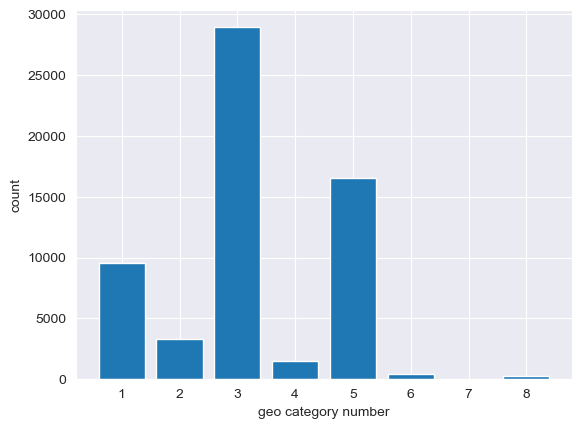

In [10]:
def get_category(lat, lng):
    if 45 <= lat <= 50 and -150 <= lng <= -110:
        return 1
    elif 35 <= lat <= 45 and -120 <= lng <= -100:
        return 2
    elif 25 <= lat <= 38 and -110 <= lng <= -90:
        return 3
    elif 28 <= lat <= 38 and -90 <= lng <= -80:
        return 4
    elif 35 <= lat <= 45 and -90 <= lng <= -70:
        return 5
    elif 40 <= lat <= 50 and -100 <= lng <= -80:
        return 6
    elif 40 <= lat <= 47 and -80 <= lng <= -60:
        return 7
    else:
        return 8  # Anything else, outside defined range


df_restaurants['geo_category'] = df_restaurants.apply(lambda row: get_category(row['lat'], row['lng']), axis=1)

category_counts = df_restaurants['geo_category'].value_counts().reset_index()

plt.bar(category_counts['geo_category'], category_counts['count'])
plt.xlabel('geo category number')
plt.ylabel('count')

In [11]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60596 entries, 0 to 60595
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             60596 non-null  int64  
 1   position       60596 non-null  int64  
 2   name           60596 non-null  object 
 3   score          33967 non-null  float64
 4   ratings        33967 non-null  float64
 5   category       60575 non-null  object 
 6   price_range    60596 non-null  int64  
 7   full_address   60596 non-null  object 
 8   zip_code       60596 non-null  object 
 9   lat            60596 non-null  float64
 10  lng            60596 non-null  float64
 11  restaurant_id  60596 non-null  float64
 12  avg_price      60596 non-null  float64
 13  price_sum      60596 non-null  float64
 14  price_min      60596 non-null  float64
 15  price_max      60596 non-null  float64
 16  desc_avg_len   60596 non-null  float64
 17  geo_category   60596 non-null  int64  
dtypes: flo

### category `3` is the most frequent category

# Now we are ready to start answring on the question
## `Is there a relationship between geographic position and review ratings?`

In [12]:
# print(df_restaurants.isnull().sum())
# print(df_restaurants_droped_null.isnull().sum())
df_restaurants_droped_null = df_restaurants.dropna(subset=['score', 'ratings'])

print(df_restaurants_droped_null['score'].corr(df_restaurants_droped_null['ratings']))
geo_cat_per_score_mean = df_restaurants_droped_null.groupby('geo_category')[['ratings', 'score']].mean().reset_index()
geo_cat_per_score_mean.columns = ['geo_category', 'ratings_count_mean', 'score_mean']
geo_cat_per_score_mean

0.1810986199852728


,geo_category,ratings_count_mean,score_mean
0,1,76.388551,4.597737
1,2,42.815821,4.505676
2,3,75.667188,4.530455
3,4,45.482963,4.496741
4,5,80.515887,4.564480
5,6,39.483607,4.467213
6,8,171.250000,4.680000


Text(0, 0.5, 'Average  ratings count')

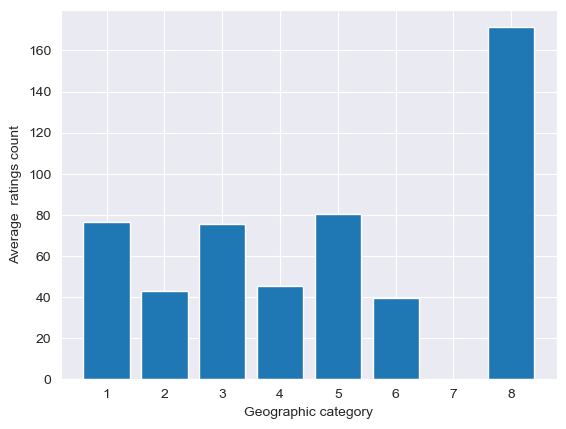

In [13]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['ratings_count_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  ratings count')

Text(0, 0.5, 'Average  score')

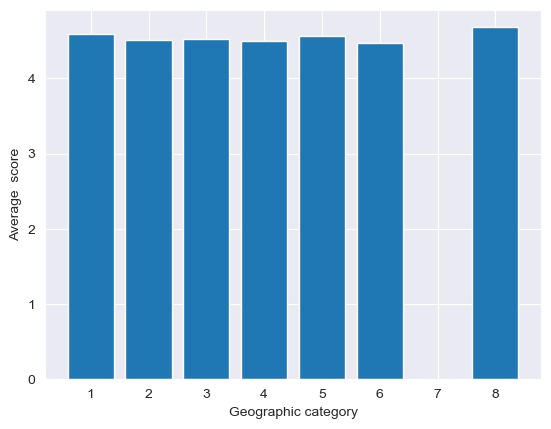

In [14]:
plt.bar(geo_cat_per_score_mean['geo_category'], geo_cat_per_score_mean['score_mean'])
plt.xlabel('Geographic category')
plt.ylabel('Average  score')

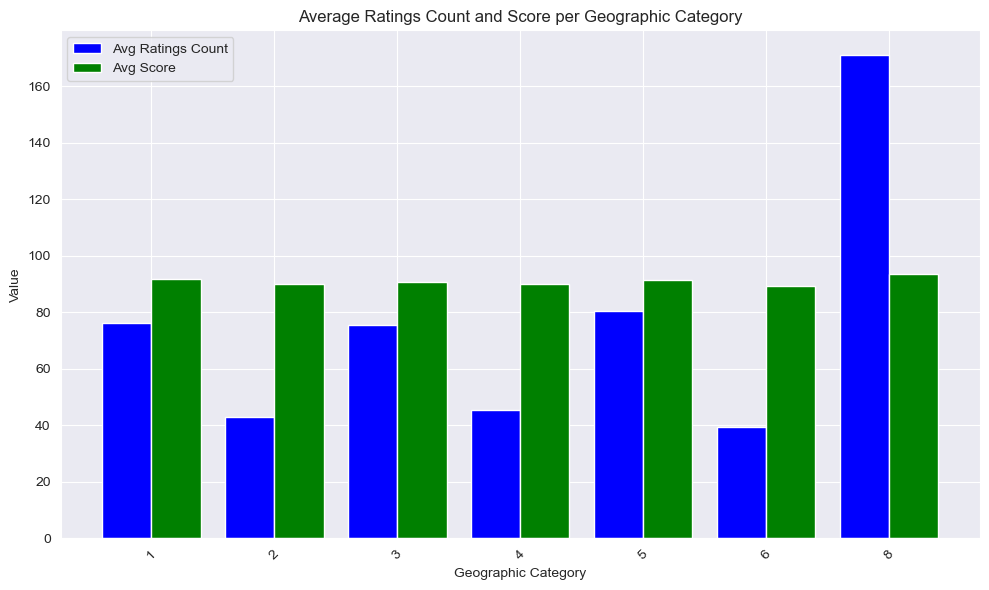

In [15]:

# Assuming geo_cat_per_score_mean is a DataFrame
labels = geo_cat_per_score_mean['geo_category']
x = np.arange(len(labels))  # the label locations
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Blue bars for ratings count
bars1 = ax.bar(x - width / 2, geo_cat_per_score_mean['ratings_count_mean'] / 100 * 100, width,
               label='Avg Ratings Count', color='blue')

# Green bars for score
bars2 = ax.bar(x + width / 2, geo_cat_per_score_mean['score_mean'] / 5 * 100, width, label='Avg Score', color='green')

# Labels and title
ax.set_xlabel('Geographic Category')
ax.set_ylabel('Value')
ax.set_title('Average Ratings Count and Score per Geographic Category')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

# Does description length correlate with menu price?

In [16]:
removed_zero_desc = df_restaurants[df_restaurants['desc_avg_len'] != 0.0]
removed_zero_desc['avg_price'].corr(removed_zero_desc['desc_avg_len'])


0.12015968868420501

### there are week postive coraltion between description length and price

## count most common word in description from over all menu

<BarContainer object of 5 artists>

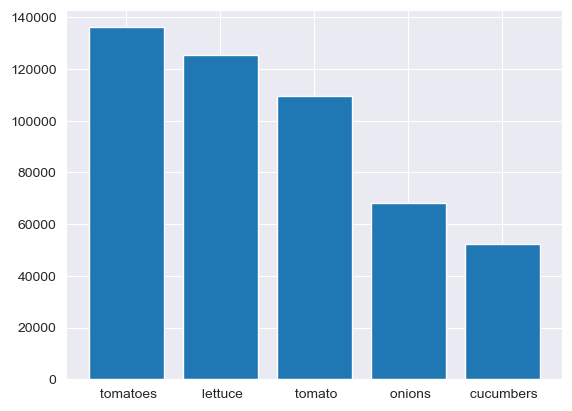

In [17]:
non_null_descriptions = df_restaurants_menus['description'].dropna()

all_words = non_null_descriptions.str.split(',', expand=True).stack()
word_counts = all_words.str.lower().value_counts()
most_common_words = word_counts.head(5)
plt.bar(most_common_words.index, most_common_words.values)


## 🧠 Insights احم احم
### How does price range correlate with customer ratings?

### Do restaurants with few ratings ever display high scores?

### Which restaurants have the highest scores overall?

### What is the average menu price by price category?

### Do menu prices vary more within cheap or expensive restaurants?


### Start with Price range correlation with Customer ratings

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/processed/processed_restaurants_no_outliers.csv')

# Remove NaN from score 3shan n7sb sa7
df_valid = df[df['score'].notna()].copy()



## Visualize Scores by Price Range with Boxplot

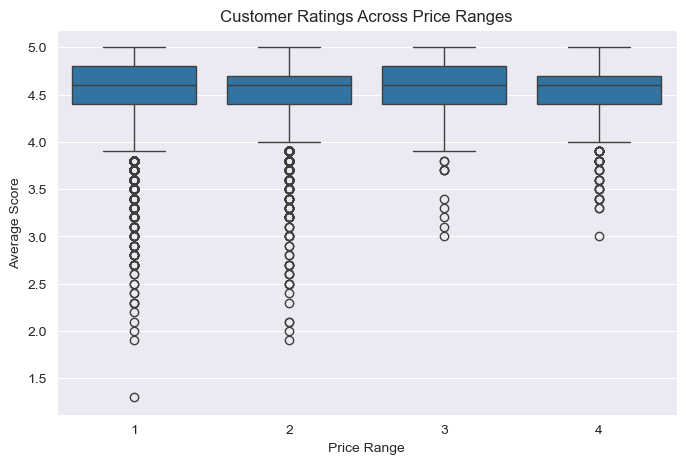

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_valid, x='price_range', y='score', order=['1', '2', '3', '4'])
plt.title('Customer Ratings Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average Score')
plt.show()

# Describe scores per group

In [22]:
df_valid.groupby('price_range')['score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
price_range,,,,,,,,
1,25839.0,4.56,0.30,1.3,4.4,4.6,4.8,5.0
2,6935.0,4.51,0.32,1.9,4.4,4.6,4.7,5.0
3,187.0,4.55,0.35,3.0,4.4,4.6,4.8,5.0
4,1006.0,4.55,0.29,3.0,4.4,4.6,4.7,5.0


# CORELLATION ANALYSIS

In [23]:
correlation = df_valid[['price_range', 'score']].corr().iloc[0, 1]
print(f"Correlation between price level and average score: {correlation:.3f}")

if correlation > -0.05 and correlation < 0.05:
    print("No or very weak correlation between price level and average score.")
elif correlation > 0.05:
    print("Positive correlation between price level and average score.")


Correlation between price level and average score: -0.037
No or very weak correlation between price level and average score.


# -----------------------

## Do restaurants with few ratings ever display high average scores?

### We want to detect potential bias where restaurants with low count of ratings has high scores
###    for reasons like family/friends members rating the restaurants with bias

### First we Filter out the restaurants with few ratings but high scores
###     lets say <20 ratings is low with a score of > 4.5 is reason to believe there is bias

In [24]:
df_few_high = df_valid[  ## few عشان few count ratings و high عشان high score
    (df_valid['ratings'] <= 25) &
    (df_valid['score'] >= 4.5)
    ]


## Show the sample

In [25]:
df_few_high[['name', 'score', 'ratings', 'price_range']].sort_values(by='score', ascending=False)


,name,score,ratings,price_range
50781,Caracol,5.0,12.0,2
9046,Tiantian Noodles,5.0,14.0,2
8822,Bowl Gogi,5.0,25.0,1
41943,Golden Chick (1943 Kings Hwy),5.0,12.0,1
26487,Potomac Grocer,5.0,23.0,1
...,...,...,...,...
46672,Vidorra ( Addison ),4.5,24.0,1
46627,"Dansungsa Korean Restaurant, Bar &amp; Karaoke",4.5,17.0,1
15098,"Cinnabon (1101 Outlet Collection Way, Suite #...",4.5,11.0,1
15127,Cosmic Wings (Federal Way),4.5,20.0,1


# Plot it

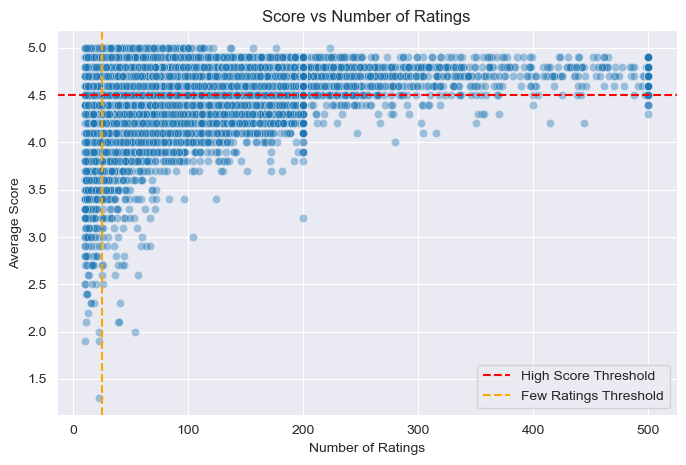

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_valid, x='ratings', y='score', alpha=0.4)
plt.axhline(4.5, color='red', linestyle='--', label='High Score Threshold')
plt.axvline(25, color='orange', linestyle='--', label='Few Ratings Threshold')
plt.title('Score vs Number of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Average Score')
plt.legend()
plt.show()

### We found that 5454 restaurants had a score ≥ 4.5 but only 20 or fewer ratings.

### This suggests some bias but might not be reliable due to a small sample size.


### Save our findings in a csv file

In [27]:
df_few_high.to_csv('data/processed/few_ratings_high_score.csv', index=False)


# Which restaurants have the highest scores overall?

### first we sort by score and ratings to get overall highest rated restaurant

In [28]:
df_top_sorted = df_valid.sort_values(by=['score', 'ratings'],
                                     ascending=[False, False])


### Now we Show the top 10 of data

In [29]:
df_top_sorted[['name', 'score', 'ratings', 'price_range']].head(10)


,name,score,ratings,price_range
17731,Starbucks (S. Van Dorn and Pickett),5.0,223.0,1
27498,Sundevich,5.0,176.0,1
22226,Berries &amp; Bowls,5.0,156.0,1
22005,Starbucks (South Riding Blvd),5.0,137.0,1
19164,Open Road (ROSSLYN),5.0,136.0,1
42160,Delightful Donut,5.0,121.0,1
45495,Smoothie King (5000 Belt Line Road),5.0,118.0,1
34018,Cafe Vida (Rogers Ranch),5.0,114.0,1
60190,Purify Bowls &amp; Smoothies,5.0,113.0,1
11574,Banh Mi Up,5.0,112.0,1


## Plot for top 10

C:\Users\mosta\AppData\Local\Temp\ipykernel_18328\1651431268.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')


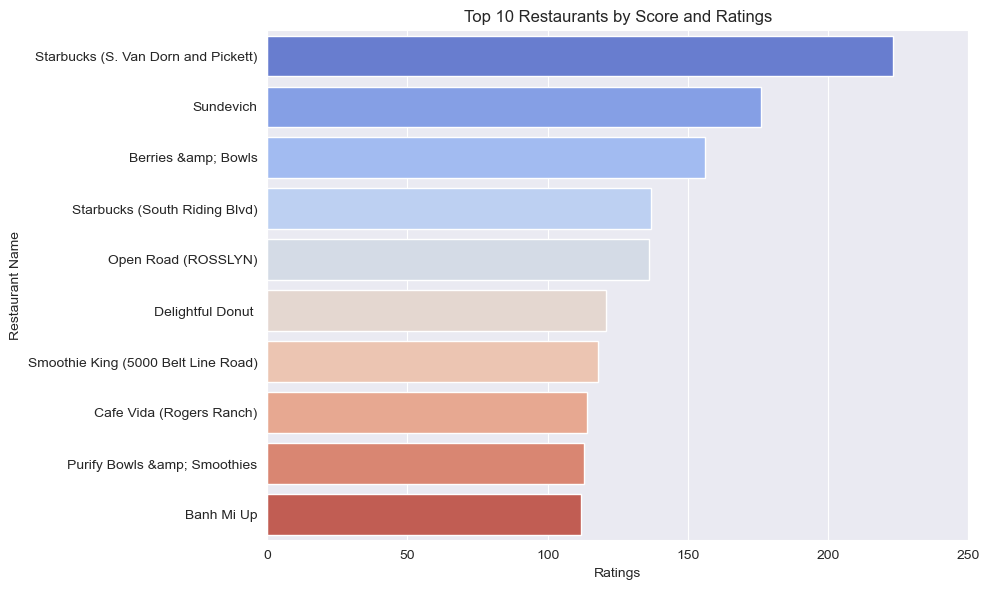

In [30]:
top_10 = df_top_sorted.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='name', x='ratings', palette='coolwarm')
plt.title('Top 10 Restaurants by Score and Ratings')
plt.xlabel('Ratings')
plt.ylabel('Restaurant Name')
plt.xlim(0, 250)
plt.tight_layout()
plt.show()
